# An exploration of factors that may impact obesity in America

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 100

In [3]:
# reading in and tidying data
obesity_df = pd.read_csv("../../processed_data/updated_obesity_data.csv")
obesity_df = obesity_df.drop(columns = ["grocery", "supercenters", "convenience_stores", "speciality_stores", "food_stamp_stores", "number_fast_foods", "full_service_count", "farmers_markets", "food_banks_18_x", "food_stamp_fm", "total_fi_people", "num_fi_children"])

In [4]:
#reading in and cleaning obesity data 
obesity_df = pd.read_csv("../../processed_data/Obesity_clean.csv")
obesity_df = obesity_df.drop(columns = "State")
obesity_df.columns = ["county", "fips", "obesity_rate"]

# reading in farmers market data
fm_df = pd.read_csv("../../processed_data/farmers_markets.csv")

# reading in food insecurity data
fi_df = pd.read_csv("../../processed_data/fi_data.csv")

# reading in and cleaning up food assitance data frame
assistance_df = pd.read_csv("../../processed_data/Assistance dataset_update2_clean.csv")
assistance_df = assistance_df.drop(columns = ["snap_auth_stores_chg_12_17", "snap_bens_per_cap_chg_12_17", "school_lunch_prog_chg_12_17", "school_bfast_prog_chg_12_17", "smr_food_prog_12_17", "wic_parts_pop_12_17"])

# reading in population dataset (note, this is an estimate of the 2017 population for each county)
pop_df = pd.read_csv("../../processed_data/new_population3 (1).csv")
pop_df.columns = ["fips", "population"]

# reading in and cleaning up restaurant dataset
restaurant_df = pd.read_csv("../../processed_data/restaurants_clean.csv")
restaurant_df = restaurant_df.drop(columns = ["fast_food_exp_percap_12", "full_service_exp_percap_12", "Unnamed: 0"])

# reading in and cleaning store access data
store_access = pd.read_csv("../../processed_data/store_access_clean.csv")
store_access = store_access.drop(columns = "Unnamed: 0")

# reading in and cleaning store access data
store_types = pd.read_csv("../../processed_data/store_clean.csv")
store_types = store_types.drop(columns = "Unnamed: 0")

# reading demographic data set
demography = pd.read_csv("../../processed_data/demographic_data_2017.csv")

# reading in income data
median_income = pd.read_csv("../../processed_data/median_income_2017.csv")

In [5]:
# merging all of our datsets on the fips code (which is the id of a county)
merged_df = pd.merge(store_access, store_types, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, obesity_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, fm_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, fi_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, assistance_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, pop_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, restaurant_df, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, demography, how = 'left', on = 'fips')
merged_df = pd.merge(merged_df, median_income, how = 'left', on = 'fips')

# dropped columns that had only number of (variable). Kept the concentration
merged_df = merged_df.drop(columns = ["state_y", "region_y", "county_y", "pop_low_access_15","low_income_low_access_15", "no_car_low_access_15", "snap_low_access_15", "child_low_access_15", "senior_low_access_15", "white_low_access_15", "black_low_access_15", "hispanic_low_access_15", "asian_low_access_15", "nhna_low_access_15", "multiracial_low_access_15", "grocery_16", "super_16", "convenience_16", "specialty_16", "snap_available_17", "wic_available_16", "farmers_markets", "fm_accepts_snap", "fm_accept_wic", "fm_accept_credit", "total_fi_people", "num_fi_children", "snap_auth_stores_17", "food_banks_18", "population", "fast_food_16", "full_service_16"])

# renamed columns
merged_df.columns = ['fips', 'state', 'county', 'percent_pop_low_access_15',
       'percent_low_income_low_access_15', 'percent_no_car_low_access_15',
       'percent_snap_low_access_15', 'percent_child_low_access_15',
       'percent_senior_low_access_15', 'percent_white_low_access_15',
       'percent_black_low_access_15', 'percent_hispanic_low_access_15',
       'percent_asian_low_access_15', 'percent_nhna_low_access_15',
       'nhpi_low_access_15', 'percent_nhpi_low_access_15',
       'percent_multiracial_low_access_15', 'grocery_per1000',
       'super_per1000', 'convenience_per1000', 'specialty_per1000',
       'snap_available_per1000', 'wic_available_per1000', 'county_x',
       'obesity_rate', 'state_x', 'farmers_markets_per1000',
       'pct_fm_accepting_snap', 'pct_fm_accept_wic', 'pct_fm_credit',
       'fm_sell_frveg', 'pct_fm_sell_frveg', 'region', 'fi_rate',
       'child_fi_rate', 'cost_per_meal', 'est_annual_food_budget_shortfall',
       'state_x', 'county_x', 'snap_bens_per1000', 'school_lunch_prog_17',
       'school_bfast_prog_17', 'smr_food_prog_17', 'wic_parts_pop_17',
       'fast_food_per1000', 'full_service_per1000', 'pop_estimate',
       'percent_white', 'percent_black', 'percent_native_american',
       'percent_asian', 'percent_nhpi', 'percent_multi',
       'percent_nonwhite_hispanic', 'median_household_income']

# dropped more renames
merged_df = merged_df.drop(columns = ["state_x", "county_x"])

In [12]:
merged_df.to_csv("../../processed_data/merged_obesity.csv")

### Looking at Obesity

In [7]:
merged_df["obesity_rate"].describe()

count    3109.000000
mean       30.965294
std         4.463893
min        10.700000
25%        28.500000
50%        31.200000
75%        33.700000
max        46.600000
Name: obesity_rate, dtype: float64

In [8]:
subset = merged_df[['region', 'obesity_rate']]
subset.groupby('region').describe().unstack(1).reset_index().pivot(index='region', values=0, columns='level_1')

level_1,25%,50%,75%,count,max,mean,min,std
region,,,,,,,,
M,29.70,31.5,33.10,879.0,44.5,31.465529,21.0,2.873670
N,25.50,28.4,30.70,245.0,39.5,28.102041,14.7,4.013997
O,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
S,29.95,32.4,35.25,1395.0,46.6,32.595842,17.0,4.097203
W,24.40,27.8,31.40,590.0,40.8,27.553729,10.7,4.969132


<AxesSubplot:title={'center':'Obesiy Rates'}, ylabel='Frequency'>

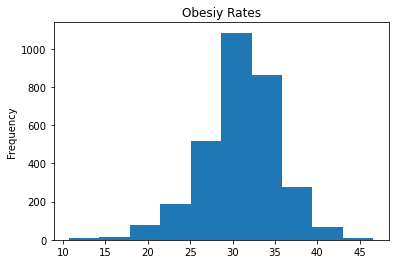

In [10]:
merged_df["obesity_rate"].plot.hist(title = "Obesiy Rates")

Text(0.5, 1.0, 'region vs. obesity_rate')

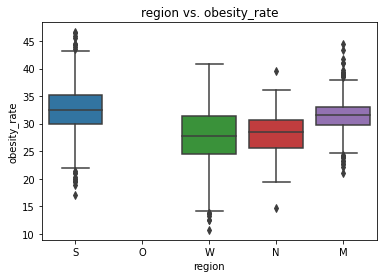

In [11]:
sns.boxplot(x = "region", y='obesity_rate', data = merged_df)
plt.title("region vs. obesity_rate")